# Plot fBM

## Import Packages

In [1]:
# Directory Management
import os
os.chdir(os.getcwd())

# Data Structures
import numpy as np
import pandas as pd

# General
import math
from decimal import Decimal

# Plot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns
sns.set_style("whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

# Stochastics
from fbm import FBM

import random
random.seed(2024)
np.random.seed(2024)

## Helper Function(s)

In [2]:
def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

## Generate Data

Define Global Parameters

In [3]:
N = 10**3
Hurst_rough = 0.1 
Hurst_smooth = 0.9

Generate Data

In [4]:
# Initialize fBM Generators
fBM_rough = FBM(n=N, hurst=Hurst_rough, length=1, method='daviesharte')
BM = FBM(n=N, hurst=0.5, length=1, method='daviesharte')
fBM_smooth = FBM(n=N, hurst=Hurst_smooth, length=1, method='daviesharte')

# Generate a fBm realization
fBM_rough_sample = fBM_rough.fbm()
BM_sample = BM.fbm()
fBM_smooth_sample = fBM_smooth.fbm()

# Get the times associated with the fBm
t_values = fBM_rough.times()

/Users/annie/opt/miniconda3/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(


## Plot

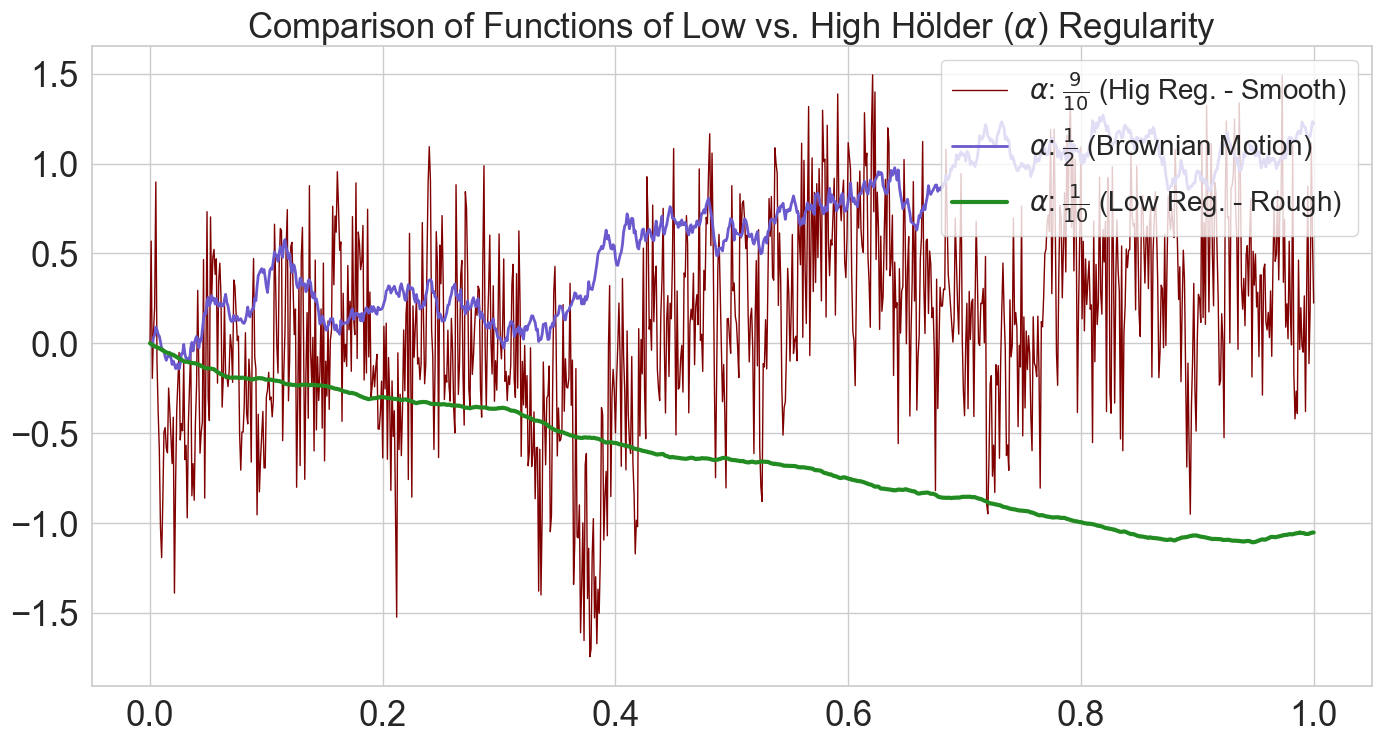

In [10]:
## Get Main Plot    
ax = plt.figure(figsize=(16,8))

axes1 = ax.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes


axes1.plot(t_values,fBM_rough_sample,color='maroon', 
           label = r'$\alpha$: $\frac{9}{10}$ (Hig Reg. - Smooth)',
#            label = r'$\alpha$: '+str('{:.1e}'.format(Hurst_rough))+str('(Hig Reg. - Smooth)'),
           linewidth=1)
axes1.plot(t_values,BM_sample,color='slateblue', 
           label = r'$\alpha$: $\frac{1}{2}$ (Brownian Motion)',
           linewidth=2)
axes1.plot(t_values,fBM_smooth_sample,color='forestgreen', 
           label = r'$\alpha$: $\frac{1}{10}$ (Low Reg. - Rough)',
#            label = r'$\alpha$: '+str('{:.1e}'.format(Hurst_rough))+str('(Low Reg. - Rough)'),
           linewidth=3)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


# Labels
plt.title(r'Comparison of Functions of Low vs. High Hölder ($\alpha$) Regularity',fontsize=25)
# plt.xlabel("Value of F",fontsize=25)
# plt.ylabel("Value of Risk-Bound",fontsize=25)
plt.legend(fontsize=25,loc='upper right')


## Save PDF
plt.savefig('VisualizefBM_PDF.pdf')
## Save JPEG
plt.savefig('VisualizefBM_JPG.jpg')

## PLOT
plt.show()

---
# Fin
---